In [13]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=3, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote/'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results'

output_directory = WRITE_DIRECTORY_ROOT + '/openml/model_materialization'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [14]:
result_folder = ROOT_RESULT_FOLDER + '/model_materialization/openml'
result_file = result_folder + '/cloud-41/2019-10-11.csv'

In [16]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'setup', 'flow', 'type', 'run_time', 'score', 'best_score'
]

method_map = {'optimized': 'CO', 'baseline': 'OM'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)

execution_times['cumulative_run_time'] = execution_times.groupby(
    ['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())
execution_times['pipeline'] = execution_times.groupby(
    ['exp_id', 'type']).cumcount()+1
execution_times['type'] = execution_times['type'].replace(method_map)


In [17]:
def plot_executions_reuse(df, loc=None):
    plt.figure(figsize=(10,4))
    plot = sns.lineplot(
        data=df,
        x='pipeline',
        y='cumulative_run_time',
        hue='type',
        style='type',
        #markers=["^", "o"],
        lw=3,
        hue_order=['OM', 'CO'],
       # style_order = ['baseline', 'optimized'],
        dashes=[(2, 2), (1, 0)],
        palette={
            'CO': SYSTEM_COLOR,
            'OM': BASELINE_COLOR
        },
        legend='brief')

    legend = plot.legend()
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    #top = df['run_time'].max()
    #cat.set_axis_labels('Execution Number', 'Run Time (s)')
    plot.set_xlabel('Workload', fontsize=22)
    plot.set_ylabel('Cumulative Run Time (s)', fontsize=22)
    #plot.set_xlim((1,2))
    #plot.set_ylim((0,2200))
    #plot.set_xticks(range(1,9))
    #plot.set_xticklabels(range(1,9))
    if loc is not None:
        plt.savefig(loc, bbox_inches ='tight')

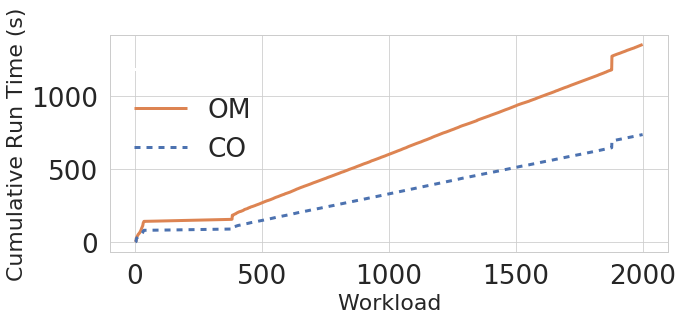

In [18]:
#plot_executions_reuse(execution_times, output_directory+'/different_workloads.pgf')
plot_executions_reuse(execution_times)

In [19]:
execution_times.sort_values('run_time', ascending=False)

,timestamp,exp_id,repo,setup,flow,type,run_time,score,best_score,cumulative_run_time,pipeline
3878,19:24:09,56222A6F,openml,6952,3911053,OM,92.568278,0.71,0.83,1272.992917,1879
1878,18:59:21,89DB3792,openml,6952,3911053,CO,46.316424,0.71,0.83,693.474999,1879
2382,19:24:09,56222A6F,openml,6954,2642150,OM,26.883707,0.70,0.82,185.362736,383
2004,19:24:09,56222A6F,openml,5914,44102,OM,20.290191,0.70,0.80,30.527109,5
4,18:59:21,89DB3792,openml,5914,44102,CO,19.581185,0.70,0.80,25.644528,5
382,18:59:21,89DB3792,openml,6954,2642150,CO,13.198317,0.70,0.82,104.586161,383
2030,19:24:09,56222A6F,openml,5995,216723,OM,12.071333,0.72,0.82,125.173329,31
2031,19:24:09,56222A6F,openml,5804,216724,OM,7.577513,0.79,0.82,132.750842,32
30,18:59:21,89DB3792,openml,5995,216723,CO,6.132387,0.72,0.82,72.788023,31
2024,19:24:09,56222A6F,openml,5804,216707,OM,5.567927,0.79,0.82,94.556335,25


In [20]:
execution_times.tail(10)

,timestamp,exp_id,repo,setup,flow,type,run_time,score,best_score,cumulative_run_time,pipeline
3990,19:24:09,56222A6F,openml,6969,3937857,OM,0.966792,0.77,0.83,1347.194923,1991
3991,19:24:09,56222A6F,openml,6969,3938040,OM,1.120169,0.80,0.83,1348.315092,1992
3992,19:24:09,56222A6F,openml,6969,3938103,OM,0.689691,0.76,0.83,1349.004783,1993
3993,19:24:09,56222A6F,openml,6969,3938148,OM,0.854347,0.76,0.83,1349.859130,1994
3994,19:24:09,56222A6F,openml,6969,3938315,OM,0.510583,0.80,0.83,1350.369713,1995
3995,19:24:09,56222A6F,openml,6969,3938732,OM,0.548765,0.80,0.83,1350.918478,1996
3996,19:24:09,56222A6F,openml,6969,3938736,OM,0.886840,0.76,0.83,1351.805318,1997
3997,19:24:09,56222A6F,openml,6969,3939022,OM,0.713508,0.77,0.83,1352.518826,1998
3998,19:24:09,56222A6F,openml,6969,3939128,OM,0.555667,0.77,0.83,1353.074493,1999
3999,19:24:09,56222A6F,openml,6969,3939524,OM,0.561678,0.78,0.83,1353.636171,2000
